1. Carga y Exploración de Datos:

Descargar y cargar el dataset.
Realizar una exploración inicial para entender la estructura del dataset.
Identificar valores faltantes, duplicados y outliers.


In [1]:
#Primeramente cargaremos el archivo
import pandas as pd
df = pd.read_csv('../Data/vehicles.csv')


In [2]:
df.head().T

,0,1,2,3,4
id,7222695916,7218891961,7221797935,7222270760,7210384030
url,https://prescott.craigslist.org/cto/d/prescott...,https://fayar.craigslist.org/ctd/d/bentonville...,https://keys.craigslist.org/cto/d/summerland-k...,https://worcester.craigslist.org/cto/d/west-br...,https://greensboro.craigslist.org/cto/d/trinit...
region,prescott,fayetteville,florida keys,worcester / central MA,greensboro
region_url,https://prescott.craigslist.org,https://fayar.craigslist.org,https://keys.craigslist.org,https://worcester.craigslist.org,https://greensboro.craigslist.org
price,6000,11900,21000,1500,4900
year,NaN,NaN,NaN,NaN,NaN
manufacturer,NaN,NaN,NaN,NaN,NaN
model,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN
cylinders,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
print(df.isnull().sum())

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [5]:
#Veo que hay bastantes valores nulos, pero a la hora de hacer predicciones vamos a eliminarlos o ignorarlos si no utilizamos esas columnas
#Antes de empezar a tratar los valores faltantes. Veremos cuales son las columnas que para la predicción considero importantes
#Eliminaré las columnas que me parecen o que considero no importantes para la predicción del precio
#Teniendo en cuenta también que el es un dataset muy grande, y así se reduce la dificultad al reproducir
df.drop(['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'county', 'lat', 'long', 'posting_date', 'size', 'state'], axis=1, inplace=True, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 45.6+ MB



Valores faltantes:
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
paint_color     130203
dtype: int64

Duplicados:
56950


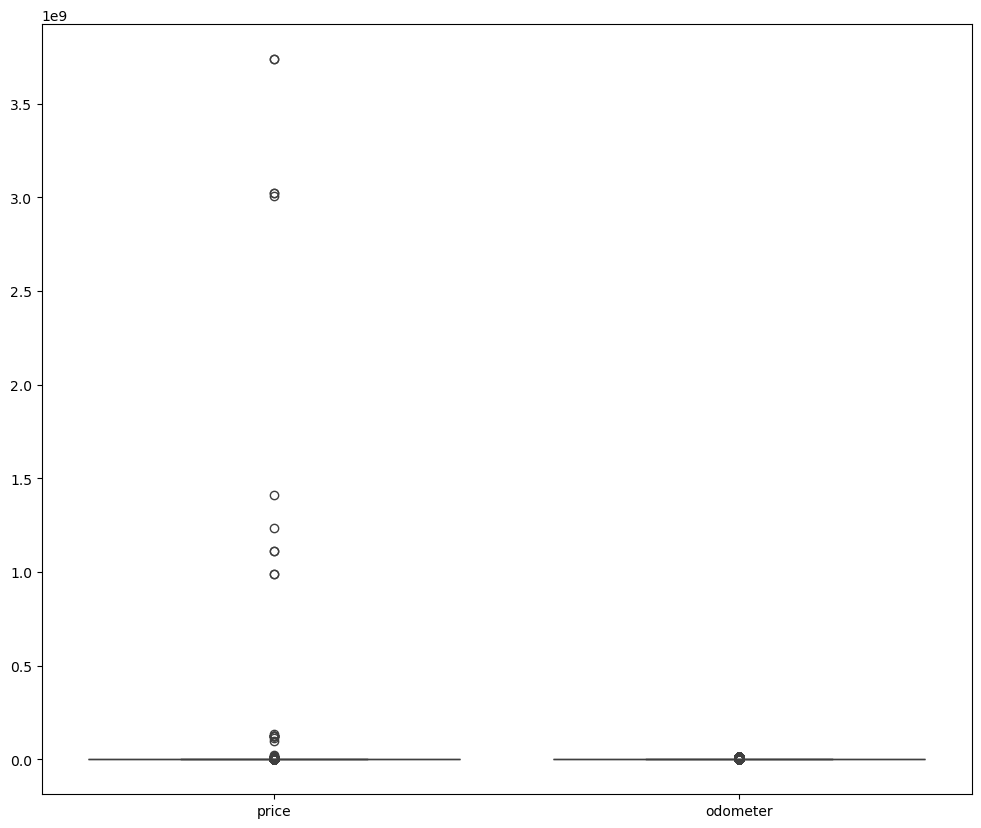

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# se verifica los duplicados
df_duplicates = df.duplicated().sum()
print("\nValores faltantes:")
print(df.isnull().sum())
print("\nDuplicados:")
print(df.duplicated().sum())

# Visualización de outliers
plt.figure(figsize = (12,10))
sns.boxplot(data = df[['price', 'odometer']])
plt.show()

2. Limpieza y Preprocesamiento:

Manejar valores faltantes.
Eliminar duplicados.
Corregir inconsistencias en los datos categóricos.
Escalar las características numéricas.
Realizar transformaciones necesarias para las características categóricas.

In [7]:
#limpiar los datos eliminando filas con valores faltantes en columnas clave para la predicción.
#Calcularemos el porcentaje de valores faltantes, para considerar eliminar o no las filas.
df.isna().sum()/df.shape[0]*100

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
drive           30.586347
type            21.752717
paint_color     30.501078
dtype: float64

In [8]:
# se elimina las filas con valores faltantes en las siguientes columnas.
df = df.dropna(subset=['year', 'odometer', 'manufacturer', 'model'])

In [9]:
# se agrega la palabra desconocido a las variables categoricas con valor nulo
df.fillna('unknown', inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399883 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        399883 non-null  object 
 1   price         399883 non-null  int64  
 2   year          399883 non-null  float64
 3   manufacturer  399883 non-null  object 
 4   model         399883 non-null  object 
 5   condition     399883 non-null  object 
 6   cylinders     399883 non-null  object 
 7   fuel          399883 non-null  object 
 8   odometer      399883 non-null  float64
 9   title_status  399883 non-null  object 
 10  transmission  399883 non-null  object 
 11  drive         399883 non-null  object 
 12  type          399883 non-null  object 
 13  paint_color   399883 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 45.8+ MB


In [11]:
#Se verifica valos duplicados y se elimina.
print("\nDuplicados:")
print(df.duplicated().sum())
df = df.drop_duplicates()
df.info()


Duplicados:
53043
<class 'pandas.core.frame.DataFrame'>
Index: 346840 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        346840 non-null  object 
 1   price         346840 non-null  int64  
 2   year          346840 non-null  float64
 3   manufacturer  346840 non-null  object 
 4   model         346840 non-null  object 
 5   condition     346840 non-null  object 
 6   cylinders     346840 non-null  object 
 7   fuel          346840 non-null  object 
 8   odometer      346840 non-null  float64
 9   title_status  346840 non-null  object 
 10  transmission  346840 non-null  object 
 11  drive         346840 non-null  object 
 12  type          346840 non-null  object 
 13  paint_color   346840 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 39.7+ MB


In [18]:
#Ahora verifico la cantidad de datos faltantes
print(df.isnull().sum())
print(df.duplicated().sum())

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64
0


In [16]:
#Ahora trataré posibles inconsistencias en los datos categóricos
fuel_unique = df['fuel'].unique()
print(fuel_unique)
transmision_unique = df['transmission'].unique()
print(transmision_unique)
condition_unique = df['condition'].unique()
print(condition_unique)

['gas' 'other' 'diesel' 'hybrid' 'unknown' 'electric']
['other' 'automatic' 'manual' 'unknown']
['good' 'excellent' 'fair' 'like new' 'new' 'unknown' 'salvage']


In [17]:
print(df.dtypes)

region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
dtype: object


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


#Dividimos los datos en entrenamiento y prueba
X = df.drop(columns = ['price']) #Toma todos excepto el precio... Puedo tomar todos porque en teoría ya eliminé los irrelevantes
y = df['price'] #Esta es mi variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Divido las categorías en numéricas y categóricas
num_columns = X.select_dtypes(include=['float64', 'int64']).columns
cat_columns = X.select_dtypes(include=['object']).columns

#Ahora creo el pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Ahora creo el pipeline para las categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_columns),
        ('cat', categorical_transformer, cat_columns)
    ]
)
#Ahora hago el pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

#Ajusto ahora el pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['year', 'odometer'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'type', 'paint_color'],
      dtype='object'))]))])

3. Exploración de Datos:

Crear visualizaciones univariadas y multivariadas.
Calcular estadísticas descriptivas.


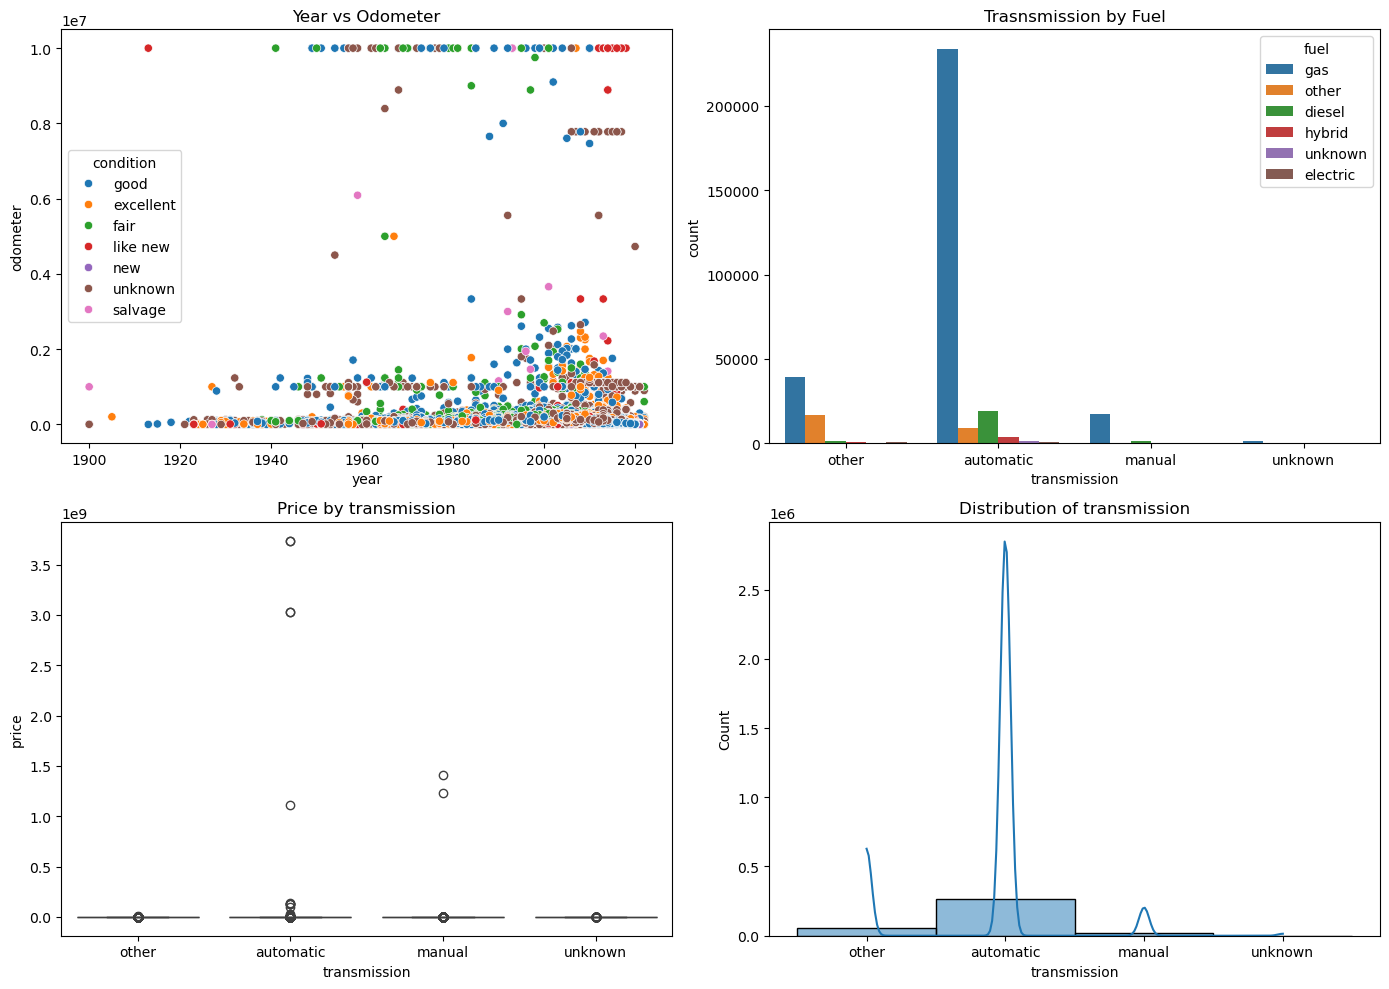

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Scatter plot
sns.scatterplot(data=df, x='year', y='odometer', hue='condition', ax=axs[0, 0])
axs[0, 0].set_title('Year vs Odometer')

# Bar plot
sns.countplot(data=df, x='transmission', hue='fuel', ax=axs[0, 1])
axs[0, 1].set_title('Trasnsmission by Fuel')

# Box plot
sns.boxplot(data=df, x='transmission', y='price', ax=axs[1, 0])
axs[1, 0].set_title('Price by transmission')

# Hist plot
sns.histplot(data=df, x='transmission', bins=10, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of transmission')

# Ajustar la posición de los subplots para evitar superposición
plt.tight_layout()
plt.show()

In [ ]:
#Vehículos más nuevos tienden a tener menor kilometraje, ya que vehículos recientes han estado menos tiempo en uso, Vehículos en mejor condición probablemente tengan menor kilometraje.
#La mayoria de los vehiculos a gas son de transmision automatica.
#Los vehiculos automaticos llegan a ser los mas costosos.
#Transmision automatica es el mas comun

In [28]:
#Características descriptivas
print(df.describe())

              price           year      odometer
count  3.468400e+05  346840.000000  3.468400e+05
mean   6.997499e+04    2011.526814  9.501220e+04
std    1.213391e+07       8.876408  1.848760e+05
min    0.000000e+00    1900.000000  0.000000e+00
25%    6.000000e+03    2008.000000  3.600000e+04
50%    1.458800e+04    2014.000000  8.358900e+04
75%    2.699000e+04    2017.000000  1.330000e+05
max    3.736929e+09    2022.000000  1.000000e+07


4. Modelado y Evaluación:

Implementar al menos dos modelos de regresión (Linear Regression y Random Forest Regressor).
Evaluar los modelos utilizando MSE, RMSE, y R^2.
Seleccionar el mejor modelo basado en las métricas de evaluación.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#Hagamos los modelos predictivos
#linear regr
linear_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')

#Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators= 10, max_depth= 10, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')

Error Cuadrático Medio: 8575836643026.116
R-cuadrado: -3484.105145558093
Error Cuadrático Medio: 12093083745389.328
R-cuadrado: -4913.467257371817


5. Optimización del Modelo:

Optimizar el modelo seleccionado utilizando GridSearchCV.

In [ ]:
#Ahora voy a optimizar con GridSearchCV
from sklearn.model_selection import GridSearchCV

#defino el pipeline para random forest con preprocesamiento
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

#Defino el rango de los hiperparámetros para GridSearch
param_grid_rf = {
    'regressor__n_estimators': [50, 100],
    'regressor__max_depth': [10, 20],
}

#Configuro el GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_pipeline, param_grid = param_grid_rf, cv = 5, scoring='neg_mean_squared_error')

#Entreno el GridSearchCV
grid_search_rf.fit(X_train, y_train)

print(f'Los mejores hiperparámetros para RandomForestRegressor: {grid_search_rf.best_params_}')
print(f'El mejor Puntaje MSE (Negativo): {-grid_search_rf.best_score_}')

#Evaluo en el conjunto de prueba
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

#Calculo las métricas
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Error Cuadrático Medio (MSE): {mse_rf:.2f}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_rf:.2f}')
print(f'R-cuadrado (R²): {r2_rf:.2f}')